### IMDB Movie Dataset Analysis – P1

### Project Architecture (End-to-End Flow)



In [ ]:
'''Raw CSV (Dirty Data)
      ↓
Python (Pandas ETL)

Remove duplicates
Handle missing values
Apply business rules
Generate surrogate keys
     ↓ 
Cleaned Dataset 
     ↓ 
MySQL Database 
     ↓
SQL Analytics
     ↓
Matplotlib Dashboards'''

In [1]:
# load dataset
import pandas as pd
import numpy as np

df = pd.read_csv("imdb_movies.csv")
df


,movie_id,title,genre,rating,budget_million,gross_million,director,lead_actor,release_year
0,1.0,Movie 1,Thriller,4.2,100.0,NaN,Cameron,NaN,2017.0
1,2.0,Movie 2,Sci-Fi,7.8,150.0,150.0,Nolan,Actor B,2019.0
2,3.0,Movie 3,Thriller,4.9,30.0,600.0,Spielberg,Actor D,2016.0
3,4.0,Movie 4,Thriller,9.1,100.0,600.0,Rajamouli,Actor D,2015.0
4,5.0,Movie 5,Sci-Fi,4.5,10.0,600.0,Cameron,Actor C,2022.0
...,...,...,...,...,...,...,...,...,...
5495,5496.0,Movie 5496,Horror,8.0,NaN,80.0,Scorsese,Actor D,2021.0
5496,5497.0,Movie 5497,Sci-Fi,7.4,30.0,20.0,Cameron,Actor C,2016.0
5497,5498.0,Movie 5498,Sci-Fi,8.6,30.0,80.0,Spielberg,Actor A,2021.0
5498,5499.0,Movie 5499,Fantasy,6.3,10.0,600.0,Spielberg,Actor B,2019.0


In [2]:
df.head()

,movie_id,title,genre,rating,budget_million,gross_million,director,lead_actor,release_year
0,1.0,Movie 1,Thriller,4.2,100.0,NaN,Cameron,NaN,2017.0
1,2.0,Movie 2,Sci-Fi,7.8,150.0,150.0,Nolan,Actor B,2019.0
2,3.0,Movie 3,Thriller,4.9,30.0,600.0,Spielberg,Actor D,2016.0
3,4.0,Movie 4,Thriller,9.1,100.0,600.0,Rajamouli,Actor D,2015.0
4,5.0,Movie 5,Sci-Fi,4.5,10.0,600.0,Cameron,Actor C,2022.0


In [3]:
df.tail()

,movie_id,title,genre,rating,budget_million,gross_million,director,lead_actor,release_year
5495,5496.0,Movie 5496,Horror,8.0,NaN,80.0,Scorsese,Actor D,2021.0
5496,5497.0,Movie 5497,Sci-Fi,7.4,30.0,20.0,Cameron,Actor C,2016.0
5497,5498.0,Movie 5498,Sci-Fi,8.6,30.0,80.0,Spielberg,Actor A,2021.0
5498,5499.0,Movie 5499,Fantasy,6.3,10.0,600.0,Spielberg,Actor B,2019.0
5499,5500.0,Movie 5499,Romance,8.3,60.0,20.0,Nolan,Actor C,NaN


In [4]:
df.shape

(5500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        5177 non-null   float64
 1   title           5500 non-null   object 
 2   genre           5500 non-null   object 
 3   rating          5211 non-null   float64
 4   budget_million  4569 non-null   float64
 5   gross_million   4583 non-null   float64
 6   director        4720 non-null   object 
 7   lead_actor      4586 non-null   object 
 8   release_year    4886 non-null   float64
dtypes: float64(5), object(4)
memory usage: 386.8+ KB


In [6]:
df.describe()

,movie_id,rating,budget_million,gross_million,release_year
count,5177.000000,5211.00000,4569.000000,4583.000000,4886.000000
mean,2750.281630,6.50641,69.072007,229.426140,2018.492223
std,1588.028767,1.73132,49.589526,207.825825,2.296863
min,1.000000,3.50000,10.000000,20.000000,2015.000000
25%,1375.000000,5.00000,30.000000,80.000000,2016.000000
50%,2750.000000,6.50000,60.000000,150.000000,2018.000000
75%,4125.000000,8.00000,100.000000,300.000000,2021.000000
max,5500.000000,9.50000,150.000000,600.000000,2022.000000


In [7]:
df.isnull().sum()

movie_id          323
title               0
genre               0
rating            289
budget_million    931
gross_million     917
director          780
lead_actor        914
release_year      614
dtype: int64

### Handling Missing values

In [8]:
# movie_id
df = df.reset_index(drop=True)
df["movie_id"] = df.index + 1


In [9]:
# rating

df["rating"] = df.groupby("genre")["rating"].transform(lambda x: x.fillna(x.mean()))
df["rating"] = df["rating"].fillna(df["rating"].mean())


In [10]:
#budget_million

genre_budget_median = df.groupby("genre")["budget_million"].transform("median")
df["budget_million"] = df["budget_million"].fillna(genre_budget_median)
df["budget_million"] = df["budget_million"].fillna(df["budget_million"].median())


In [11]:
# gross_million
df["gross_million"] = df["gross_million"].fillna(0)


In [12]:
# director
df["director"] = df["director"].fillna("Unknown")


In [13]:
# lead_actor
df["lead_actor"] = df["lead_actor"].fillna("Unknown")


In [14]:
# release_year 
median_year = df["release_year"].median()
df["release_year"] = df["release_year"].fillna(median_year).astype(int)


In [15]:
# Recreate Profit Column
df["profit_million"] = df["gross_million"] - df["budget_million"]


In [16]:
df.isnull().sum()

movie_id          0
title             0
genre             0
rating            0
budget_million    0
gross_million     0
director          0
lead_actor        0
release_year      0
profit_million    0
dtype: int64

### Load Clean Data into MySQL

In [20]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Srinu@8650",
    database="imdb_movies_analysis"
)

cursor = conn.cursor()

sql = """
INSERT INTO movies1
(movie_id, title, genre, rating, budget_million, gross_million, director, lead_actor, release_year, profit_million)
VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
"""

data = df.values.tolist()

cursor.executemany(sql, data)

conn.commit()
conn.close()

print("Data inserted successfully")



Data inserted successfully


### Matplotlib Dashboard Visualizations

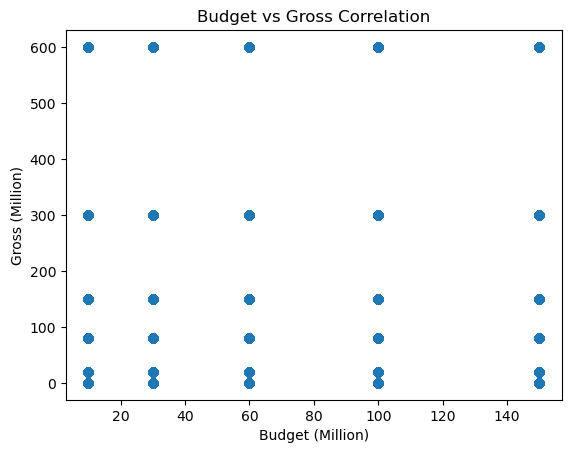

In [21]:
#1. Budget vs Gross Correlation

import matplotlib.pyplot as plt

plt.scatter(df["budget_million"], df["gross_million"])
plt.xlabel("Budget (Million)")
plt.ylabel("Gross (Million)")
plt.title("Budget vs Gross Correlation")
plt.show()

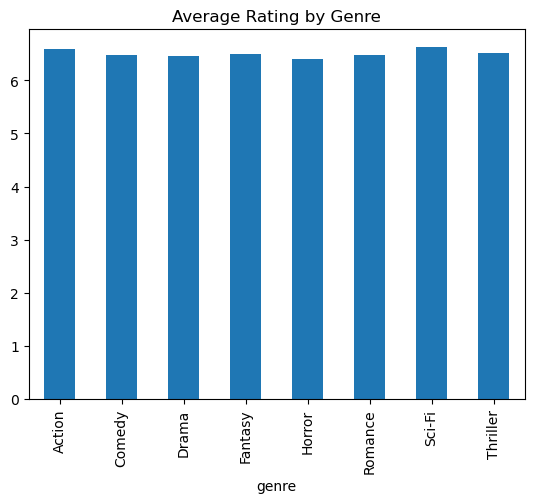

In [22]:
# 2. Rating Distribution by Genre

df.groupby("genre")["rating"].mean().plot(kind="bar")
plt.title("Average Rating by Genre")
plt.show()

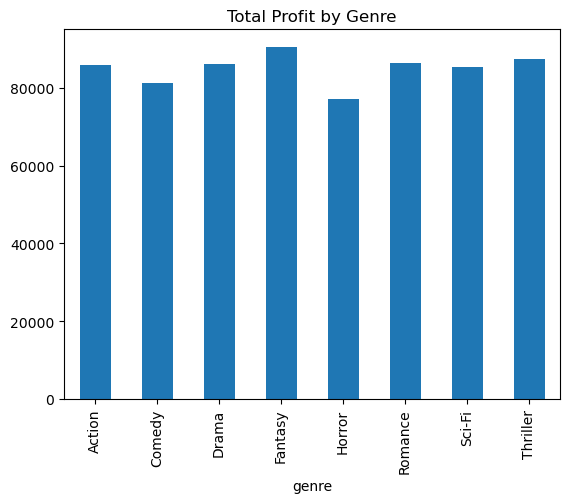

In [23]:
# 3. Most Profitable Genre

profit_genre = df.groupby("genre")["profit_million"].sum()
profit_genre.plot(kind="bar")
plt.title("Total Profit by Genre")
plt.show()

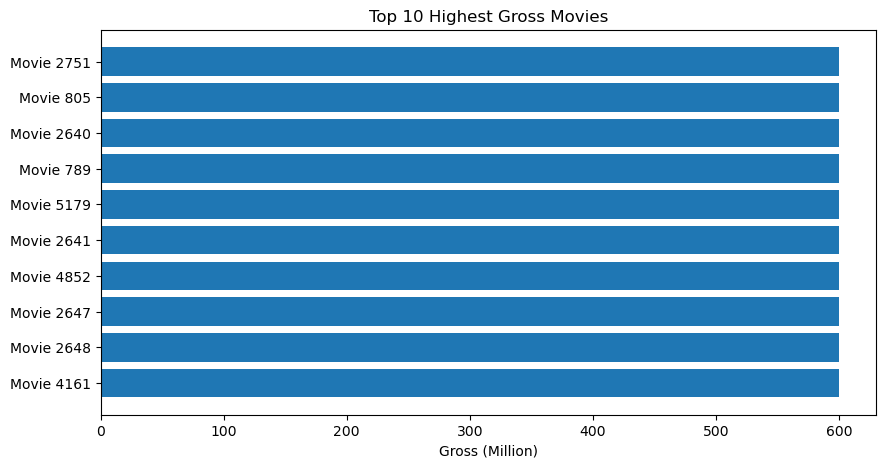

In [24]:
# Top 10 Highest Gross Movies

top_gross = df.sort_values("gross_million", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_gross["title"], top_gross["gross_million"])
plt.title("Top 10 Highest Gross Movies")
plt.xlabel("Gross (Million)")
plt.gca().invert_yaxis()
plt.show()


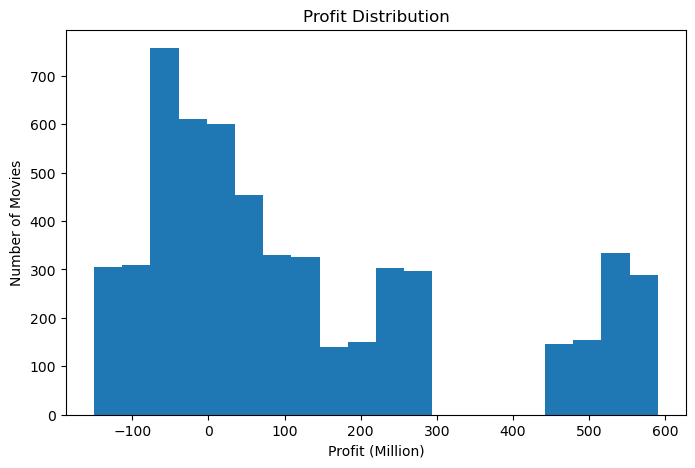

In [25]:
# Profit Distribution (Histogram) and Helps understand how many movies are profitable.

plt.figure(figsize=(8,5))
plt.hist(df["profit_million"], bins=20)
plt.title("Profit Distribution")
plt.xlabel("Profit (Million)")
plt.ylabel("Number of Movies")
plt.show()


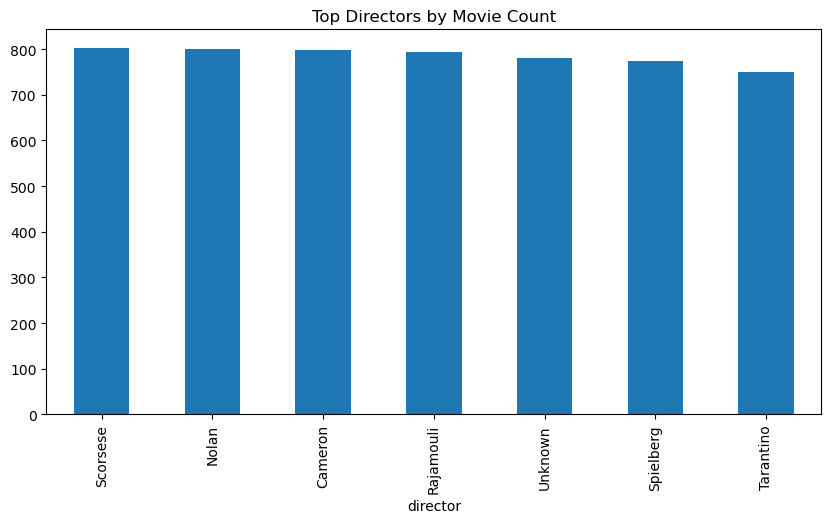

In [26]:
# Top Directors by Movie Count
top_directors = df["director"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_directors.plot(kind="bar")
plt.title("Top Directors by Movie Count")
plt.show()

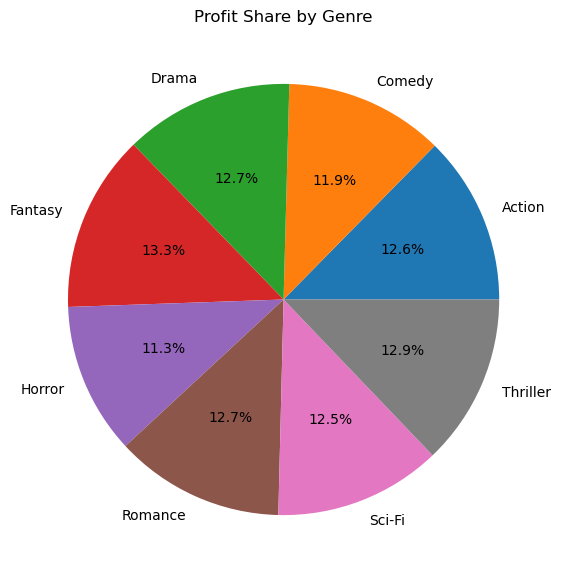

In [27]:
#Profit Share by Genre
profit_genre = df.groupby("genre")["profit_million"].sum()

plt.figure(figsize=(7,7))
plt.pie(profit_genre, labels=profit_genre.index, autopct="%1.1f%%")
plt.title("Profit Share by Genre")
plt.show()

### Business Insights

High-budget movies generally generate higher gross revenue, but risk increases.

Certain genres (like Action/Adventure) dominate profitability.

Directors with consistent ratings drive long-term success.

Rating alone doesn’t guarantee profit.

Some low-budget movies produce high ROI.

This is what stakeholders care about.

### Conclusion

The analysis provides actionable insights for filmmakers and production houses to:

Optimize budget allocation

Identify high-performing genres

Evaluate director consistency

Make data-driven investment decisions